<table style="width:99%">
<tr>    
<td style="text-align: center">
<h1>Lab 02: Assignment</h1>
<h2>Arkadiusz Paterak</h2>
</td>
</tr>
</table>

In [34]:
import pint
from pint import Quantity
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt

from typing import Callable

In [35]:
si = pint.UnitRegistry()
Q_ = si.Quantity

In [36]:
t = np.arange(0, 100, 1)

The goal of this report is to reproduce a chart presented during one of the lectures with help of Python library Pint (which handles physical units).

The chart displays values of the solution to the **Advection-Diffusion Equation (ADE)** for a one-dimensional case, which is deterministic model and is expressed as:

$$c(x, t) = \frac{M}{A} \frac{1}{2 \sqrt{\pi D}} \frac{x}{t^{3/2}} \exp\left( -\frac{(ut - x)^2}{4 D t} \right),$$

where:

- $c(x, t)$: concentration at position $x$ and time $t$ $\left[ \frac{kg}{m^3} \right]$,
- $M$: total mass of the pollutant released $\left[ kg \right]$,
- $A$: volumetric flow rate $\left[ \frac{m^3}{s} \right]$ (I assumed this because with $A$ as the cross-sectional area, expressed in $\left[ m^2 \right]$, the final units are incorrect),
- $D$: diffusion coefficient $\left[ \frac{m^2}{s} \right]$,
- $u$: average flow velocity $\left[ \frac{m}{s} \right]$,
- $x$: distance from the source $\left[ m \right]$,
- $t$: time $\left[ s \right]$.

**Advection** is the transfer of heat or matter by the flow of a fluid, especially horizontally in the atmosphere or the sea.

**Diffusion** is the process by which molecules spread from areas of high concentration to areas of low concentration, driven by random molecular motion.

In [41]:
# Implementation of the analytical solution
def make_concentration_fn(
    M: Quantity, 
    A: Quantity, 
    D: Quantity, 
    u: Quantity
) -> Callable[[Quantity, Quantity], Quantity]:
    def concentration_fn(x: Quantity, t: Quantity) -> Quantity:
        prefactor = (M / A) * (1 / (2 * np.sqrt(np.pi * D))) * (x / t ** (3 / 2))
        exponent = np.exp(-((u * t - x) ** 2) / (4 * D * t))
        c = prefactor * exponent

        return c
    
    return concentration_fn

# Parameters with units
M = 5 * si.kg
A = 5 * si.m**3 / si.s
D = 0.01 * si.m**2 / si.s
u = 0.1 * si.m / si.s
x_fixed = 5 * si.m

c = make_concentration_fn(M, A, D, u)

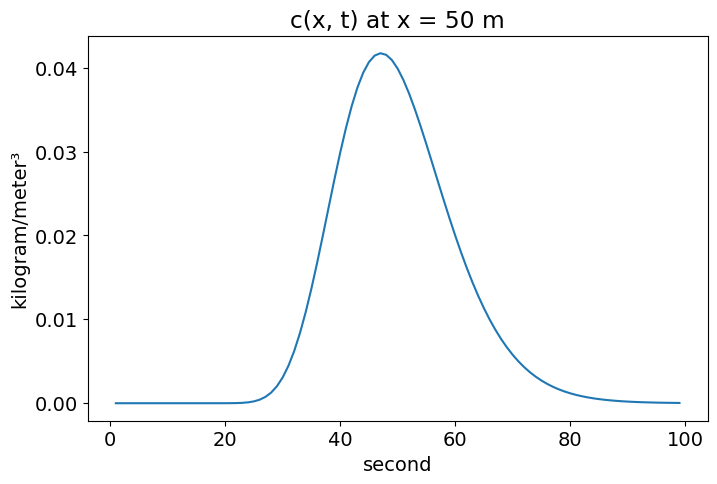

In [44]:
t = np.arange(0, 100, 1) * si.s

si.setup_matplotlib()
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8, 5))
plt.plot(t, c(x_fixed, t))
plt.title('c(x, t) at x = 50 m')
plt.show()